# Chapter 2 Exercise 4 (Cohen's D)

In [31]:
import math
import numpy
import pandas
import matplotlib
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
import nsfg
import chap01soln
preg = nsfg.ReadFemPreg()

Exercise 2.4 Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [32]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [42]:
preg['prglngth']

29.531229309203265

In [33]:
first_wgt = preg[preg['birthord']==1.0]['totalwgt_lb']
other_wgt = preg[preg['birthord']!=1.0]['totalwgt_lb']
first_wgt = first_wgt[first_wgt.notnull()]
other_wgt = other_wgt[other_wgt.notnull()]

In [34]:
first_len = preg[preg['birthord']==1.0]['prglngth']
other_len = preg[preg['birthord']!=1.0]['prglngth']
first_len  = first_len[first_len.notnull()]
other_len = other_len[other_len.notnull()]

In [44]:
print(first_wgt.mean(),other_wgt.mean(),sep='\t')
print(first_wgt.std(),other_wgt.std(),sep='\t')
print()
print(first_len.mean(),other_len.mean(),sep='\t')
print(first_len.std(),other_len.std(),sep='\t')

7.201094430437772	7.325855614973262
1.4205728777207374	1.3941954762143138

38.60095173351461	25.17124183006536
2.7919014146686947	14.825479314114457


In [21]:
print("Effective weight difference (first minus others): %s" % CohenEffectSize(first_wgt,other_wgt),
     "Effective length difference (first minus others): %s" % CohenEffectSize(first_len,other_len),sep = '\n')

Effective weight difference (first minus others): -0.08867236333202932
Effective length difference (first minus others): 1.0930083433621403


## Results

Effective weight difference (first minus others): -0.08867236333202932
Effective length difference (first minus others): 1.0930083433621403
 
The first born babies were statistally lighter than the other babies, but only by .09 standard deviations or about a twentieth of a pound difference.

The pregnacy duration differs tremendusly where first born babies tend to have longer pregnacies by 1.1 standard deviations or about 14 weeks. 

Comparing first and "other" born deviations independantly, there it can been seen that first born babies have a more predictable pregnacy duration while "other" born on average are shorter, but are generally more unpredicable. 

# Chapter 3 Exercise 1 (actual vs. biased)

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the ```NSFG``` respondent variable ```NUMKDHH``` to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the chidren and asked them how many children under 18 (including themselves) are in their household.
Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb.

In [71]:
import chap01soln
import thinkstats2
import thinkplot
import probability
%matplotlib inline
resp = chap01soln.ReadFemResp()

In [110]:
pmf = thinkstats2.Pmf(resp.numkdhh,label='Unbiased')

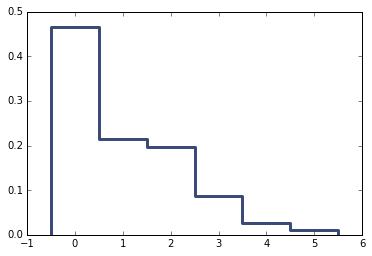

In [99]:
thinkplot.Pmf(pmf)
plt.show()

In [100]:
biased = probability.BiasPmf(pmf,label='Biased')

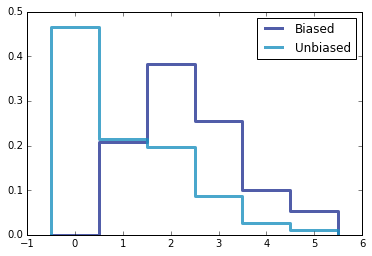

In [101]:
thinkplot.preplot(2)
thinkplot.Pmfs([biased,pmf])
thinkplot.show()

In [111]:
print ("The mean of the Unbiased PMF is: %s" % pmf.Mean(),"The mean of the Biased PMF is: %s" % biased.Mean(),sep='\n')

The mean of the Unbiased PMF is: 1.02420515504
The mean of the Biased PMF is: 2.40367910066


# Chapter 4 Exercise 2 (random distribution)

Exercise 4.2 The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [5]:
import random
import numpy as np
import math
import statistics
import statsmodels

In [ ]:
statsmodels.